## 파일 설명
- 최초 작성

## import

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from matplotlib import rc
rc('font', family='Malgun Gothic') # 한글 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호출력 설정

# 불러오기

In [1]:
df = pd.read_csv('./rawdata.CSV', encoding='euc-kr')

NameError: name 'pd' is not defined

In [ ]:
df.head(2)

In [ ]:
df.info()

# 전처리 
## 사용 안할 rows, columns 드롭

- 공통컬럼s : ['신장(5Cm단위)', '체중(5Kg 단위)', '시력(좌)', '시력(우)', '수축기 혈압', '이완기 혈압', '총 콜레스테롤', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피']
- 사용컬럼s : ['허리둘레', '식전혈당(공복혈당)', '흡연상태', '음주여부']
- 사용안할 행s : 여자

In [ ]:
for i, col in enumerate(df.columns):
    print(i, ':', col)

In [ ]:
df1 = df.iloc[:, [3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 21, 22, 23, 24, 25, 26]].copy()
df1.head(2)

In [ ]:
df2 = df1[df1['성별코드'] == 1].copy()
df2['성별코드'].unique()

In [ ]:
df2.reset_index(drop=True, inplace=True)

In [ ]:
df2.drop(columns=['성별코드'], inplace=True)

In [ ]:
df2.head(2)

## 공복혈당 결측치

In [ ]:
df2.info()

In [ ]:
df3 = df2.copy()

In [ ]:
df3.isna().sum()

In [ ]:
df3.dropna(subset=['식전혈당(공복혈당)']).isna().sum()
df3.dropna(subset=['식전혈당(공복혈당)'], inplace=True)
df3.info()

In [ ]:
df3.reset_index(drop=True, inplace=True)
df3.info()

## 연령대 하나만 남김

In [ ]:
df3.head()

In [ ]:
desc = df3['연령대 코드(5세단위)'].describe()
desc

In [ ]:
df3['연령대 코드(5세단위)'].unique()

In [ ]:
df3[df3['연령대 코드(5세단위)'] == 9].index

In [ ]:
df4 = df3.copy()

In [ ]:
df4 = df4[df4['연령대 코드(5세단위)'] == 9]

In [ ]:
df4.reset_index(drop=True, inplace=True)

In [ ]:
df4.info()

##  결측치 : 총 콜레스테롤 drop

In [ ]:
df5 = df4.copy()

In [ ]:
df5.drop(columns=['총 콜레스테롤'], inplace=True)
df5.info()

In [ ]:
df5.isna().sum()

## 결측치 : 흡연상태, 음주여부, 허리둘레 결측 행 drop

In [ ]:
df6 = df5.copy()

In [ ]:
df6.dropna(subset=['흡연상태', '음주여부', '허리둘레']).isna().sum()
df6.dropna(subset=['흡연상태', '음주여부', '허리둘레'], inplace=True)

In [ ]:
df6.isna().sum()

In [ ]:
df6.reset_index(drop=True, inplace=True)

In [ ]:
df6.info()

In [ ]:
df6.drop(columns=['연령대 코드(5세단위)'], inplace=True)

In [ ]:
df6.info()

## 이상치

In [ ]:
plt.figure(figsize=(20, 10))
df6.boxplot()
plt.ylim(0, 300)

## 이상치 : 신장

In [ ]:
df7 = df6.copy()

In [ ]:
df7['신장(5Cm단위)'].hist(range=(140, 200), bins=12)

In [ ]:
desc = df7['신장(5Cm단위)'].describe()
desc

In [ ]:
q1 = desc['25%']
q3 = desc['75%']
iqr = q3 - q1

lw = q1 - iqr*1.5
uw = q3 + iqr*1.5

print(q1, q3, iqr)
print(lw, uw)

In [ ]:
idx_drop = df7[(df7['신장(5Cm단위)'] > uw) | (df7['신장(5Cm단위)'] < lw)].index
idx_drop

In [ ]:
df7.drop(index=idx_drop, inplace=True)
df7

In [ ]:
df7.reset_index(drop=True, inplace=True)

In [ ]:
df7.head()

## 이상치 : 체중

In [ ]:
df8 = df7.copy()

In [ ]:
df8['체중(5Kg 단위)'].hist(range=(20, 140), bins=24)

In [ ]:
df8.loc[:, ['체중(5Kg 단위)']].boxplot()

In [ ]:
desc = df8['체중(5Kg 단위)'].describe()
desc

In [ ]:
q1, q3 = desc['25%'], desc['75%']
iqr = q3 - q1
lw, uw = q1 - iqr*1.5, q3 + iqr*1.5

print(q1, q3, iqr)
print(lw, uw)

In [ ]:
idx_drop = df8[(df8['체중(5Kg 단위)'] > uw) | (df8['체중(5Kg 단위)'] < lw)].index
idx_drop

In [ ]:
df8.drop(index=idx_drop, inplace=True)
df8.reset_index(drop=True, inplace=True)

In [ ]:
df8.info()

## 이상치 : 허리둘레

In [ ]:
df9 = df8.copy()

In [ ]:
df9.loc[:, ['허리둘레']].boxplot()

In [ ]:
df9['허리둘레'].hist(range=(0, 140), bins=28)

In [ ]:
desc = df9['허리둘레'].describe()
desc

In [ ]:
q1, q3 = desc['25%'], desc['75%']
iqr = q3 - q1
lw = q1 - iqr*1.5
uw = q3 + iqr*1.5
print(q1, q3, iqr)
print(lw, uw)

In [ ]:
idx_drop = df9[(df9['허리둘레'] > uw) | (df9['허리둘레'] < lw)].index

In [ ]:
df9.drop(index=idx_drop, inplace=True)
df9.reset_index(drop=True, inplace=True)

In [ ]:
df9.info()

## 이상치 : 수축기 혈압

### 함수 : drop_outlier

In [ ]:
def drop_outlier(df, col_name):
    desc = df[col_name].describe()
    q1, q3 = desc['25%'], desc['75%']
    iqr = q3 - q1
    lw = q1 - iqr*1.5
    uw = q3 + iqr*1.5
    print(q1, q3, iqr)
    print(lw, uw)
    idx_drop = df[(df[col_name] > uw) | (df[col_name] < lw)].index
    df.drop(index=idx_drop, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
df10 = df9.copy()

In [ ]:
df10.columns

In [ ]:
df10['수축기 혈압'].hist(range=(70, 280), bins=42)

In [ ]:
df10.loc[:, ['수축기 혈압']].boxplot()

In [ ]:
df10.info()

In [ ]:
df10 = drop_outlier(df10, '수축기 혈압')
df10.info()

## 이상치 : 이완기 혈압 ~ 감마 지티피

In [ ]:
df11 = df10.copy()

In [ ]:
for col in df10.columns[6:12]:
    print(col)
    df11 = drop_outlier(df11, col)

In [ ]:
df11.info()

## 결측치 drop

In [ ]:
df12 = pd.read_pickle('./WHtR_concat/01/reduction_01.pkl')

In [ ]:
df12.isna().sum()

In [ ]:
df12.dropna(inplace=True)

In [ ]:
df12.isna().sum()

In [ ]:
df12.reset_index(inplace=True, drop=True)

# 그룹화에 사용 가능 컬럼 선정

## 흡연상태

In [6]:
import pandas as pd
df_smoke = pd.read_pickle('./reduction_02.pkl')
df_smoke.head()

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,165,60,72.1,1.2,1.5,127.0,79.0,90.0,1.1,21.0,27.0,21.0,1.0,0.0
1,185,85,94.0,1.2,1.2,114.0,72.0,86.0,1.1,25.0,32.0,26.0,3.0,1.0
2,165,55,77.5,1.5,1.5,130.0,70.0,87.0,0.9,18.0,10.0,15.0,1.0,0.0
3,165,75,84.0,1.0,1.0,139.0,80.0,92.0,0.9,27.0,30.0,25.0,2.0,1.0
4,175,70,83.0,0.9,1.2,110.0,70.0,120.0,0.8,19.0,14.0,25.0,3.0,1.0


In [7]:
df_smoke.corr()

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
신장(5Cm단위),1.000000,0.454712,0.201513,0.013498,0.010735,0.032670,0.001822,0.021294,0.043766,-0.037445,-0.020334,-0.032611,0.020522,0.052922
체중(5Kg 단위),0.454712,1.000000,0.812286,0.012180,0.014594,0.244749,0.204881,0.152500,0.077333,0.131788,0.302799,0.198254,0.012450,0.044847
허리둘레,0.201513,0.812286,1.000000,-0.002606,-0.000349,0.222617,0.209572,0.146519,0.035809,0.151401,0.346258,0.254378,0.014987,0.040811
시력(좌),0.013498,0.012180,-0.002606,1.000000,0.389503,0.003248,0.005345,-0.001758,-0.006356,-0.001411,-0.006777,-0.012223,-0.011468,0.005432
시력(우),0.010735,0.014594,-0.000349,0.389503,1.000000,0.005170,0.007706,-0.002727,-0.007312,0.010812,0.004248,-0.007745,-0.017259,0.000309
수축기 혈압,0.032670,0.244749,0.222617,0.003248,0.005170,1.000000,0.728616,0.126998,-0.020302,0.094636,0.126072,0.168579,0.010137,0.037998
이완기 혈압,0.001822,0.204881,0.209572,0.005345,0.007706,0.728616,1.000000,0.120640,-0.008323,0.106710,0.137461,0.189241,0.018557,0.050810
식전혈당(공복혈당),0.021294,0.152500,0.146519,-0.001758,-0.002727,0.126998,0.120640,1.000000,0.027637,0.021568,0.115683,0.172436,0.034543,0.045809
혈청크레아티닌,0.043766,0.077333,0.035809,-0.006356,-0.007312,-0.020302,-0.008323,0.027637,1.000000,0.057465,0.047106,0.009149,-0.061740,-0.006329
(혈청지오티)AST,-0.037445,0.131788,0.151401,-0.001411,0.010812,0.094636,0.106710,0.021568,0.057465,1.000000,0.670573,0.327020,-0.008824,0.031180


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

<AxesSubplot:>

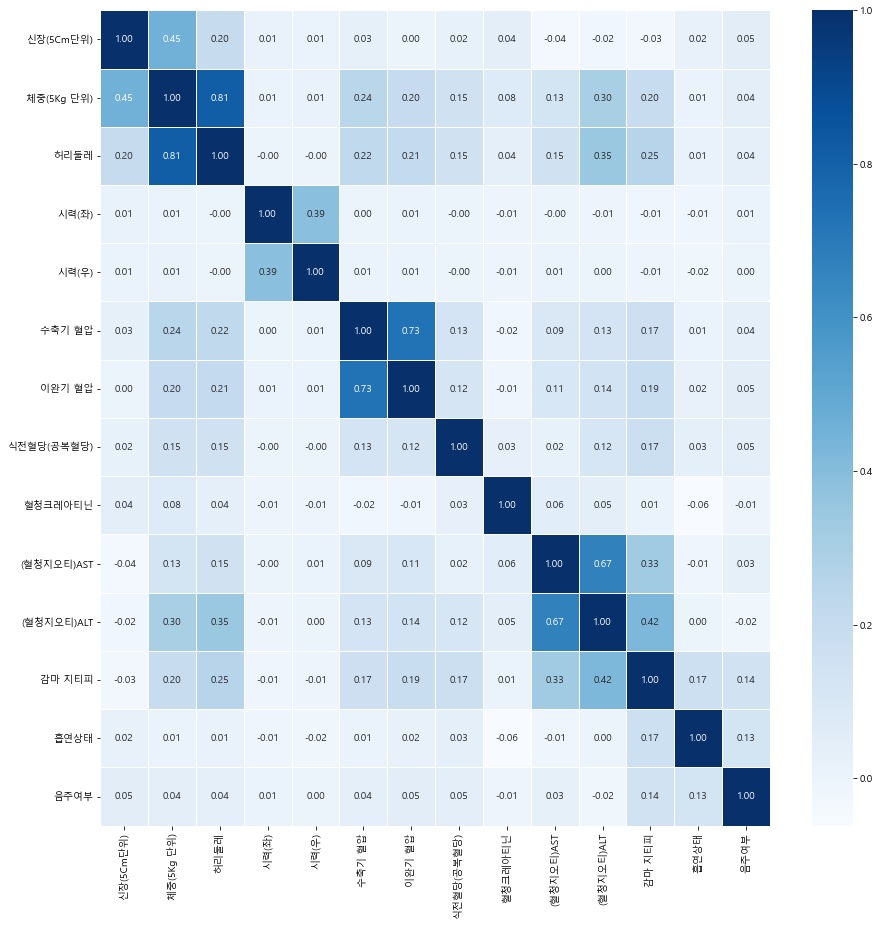

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_smoke.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [10]:
corr_df = df_smoke.corr()
corr_df = corr_df.apply(lambda x: round(x ,2))
corr_df

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
신장(5Cm단위),1.00,0.45,0.20,0.01,0.01,0.03,0.00,0.02,0.04,-0.04,-0.02,-0.03,0.02,0.05
체중(5Kg 단위),0.45,1.00,0.81,0.01,0.01,0.24,0.20,0.15,0.08,0.13,0.30,0.20,0.01,0.04
허리둘레,0.20,0.81,1.00,-0.00,-0.00,0.22,0.21,0.15,0.04,0.15,0.35,0.25,0.01,0.04
시력(좌),0.01,0.01,-0.00,1.00,0.39,0.00,0.01,-0.00,-0.01,-0.00,-0.01,-0.01,-0.01,0.01
시력(우),0.01,0.01,-0.00,0.39,1.00,0.01,0.01,-0.00,-0.01,0.01,0.00,-0.01,-0.02,0.00
수축기 혈압,0.03,0.24,0.22,0.00,0.01,1.00,0.73,0.13,-0.02,0.09,0.13,0.17,0.01,0.04
이완기 혈압,0.00,0.20,0.21,0.01,0.01,0.73,1.00,0.12,-0.01,0.11,0.14,0.19,0.02,0.05
식전혈당(공복혈당),0.02,0.15,0.15,-0.00,-0.00,0.13,0.12,1.00,0.03,0.02,0.12,0.17,0.03,0.05
혈청크레아티닌,0.04,0.08,0.04,-0.01,-0.01,-0.02,-0.01,0.03,1.00,0.06,0.05,0.01,-0.06,-0.01
(혈청지오티)AST,-0.04,0.13,0.15,-0.00,0.01,0.09,0.11,0.02,0.06,1.00,0.67,0.33,-0.01,0.03


In [11]:
# Series이므로 DataFrame으로 변경한다. 
s = corr_df.unstack()
df_smoke1 = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df_smoke1.style.background_gradient(cmap='viridis')

,,corr
허리둘레,체중(5Kg 단위),0.810000
체중(5Kg 단위),허리둘레,0.810000
수축기 혈압,이완기 혈압,0.730000
이완기 혈압,수축기 혈압,0.730000
(혈청지오티)AST,(혈청지오티)ALT,0.670000
(혈청지오티)ALT,(혈청지오티)AST,0.670000
신장(5Cm단위),체중(5Kg 단위),0.450000
체중(5Kg 단위),신장(5Cm단위),0.450000
감마 지티피,(혈청지오티)ALT,0.420000
(혈청지오티)ALT,감마 지티피,0.420000


In [12]:
corr5 = corr_df.nlargest(10, '흡연상태')
corr5 = corr5[list(corr5.index)]
corr5

,흡연상태,감마 지티피,음주여부,식전혈당(공복혈당),신장(5Cm단위),이완기 혈압,체중(5Kg 단위),허리둘레,수축기 혈압,(혈청지오티)ALT
흡연상태,1.00,0.17,0.13,0.03,0.02,0.02,0.01,0.01,0.01,0.00
감마 지티피,0.17,1.00,0.14,0.17,-0.03,0.19,0.20,0.25,0.17,0.42
음주여부,0.13,0.14,1.00,0.05,0.05,0.05,0.04,0.04,0.04,-0.02
식전혈당(공복혈당),0.03,0.17,0.05,1.00,0.02,0.12,0.15,0.15,0.13,0.12
신장(5Cm단위),0.02,-0.03,0.05,0.02,1.00,0.00,0.45,0.20,0.03,-0.02
이완기 혈압,0.02,0.19,0.05,0.12,0.00,1.00,0.20,0.21,0.73,0.14
체중(5Kg 단위),0.01,0.20,0.04,0.15,0.45,0.20,1.00,0.81,0.24,0.30
허리둘레,0.01,0.25,0.04,0.15,0.20,0.21,0.81,1.00,0.22,0.35
수축기 혈압,0.01,0.17,0.04,0.13,0.03,0.73,0.24,0.22,1.00,0.13
(혈청지오티)ALT,0.00,0.42,-0.02,0.12,-0.02,0.14,0.30,0.35,0.13,1.00


### 흡연상태와 상관관계 있는(0.1이상) 컬럼
- 감마 지티피(0.17)
- 음주여부(0.13)

## 흡연과 감마지티피 추세선&기울기 확인

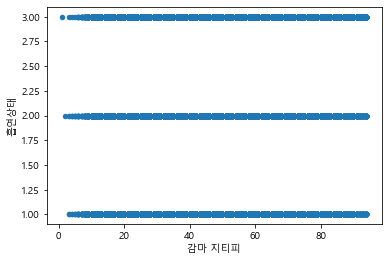

In [13]:
import matplotlib.pyplot as plt
df_smoke.plot(kind='scatter',x='감마 지티피',y='흡연상태')
plt.show()

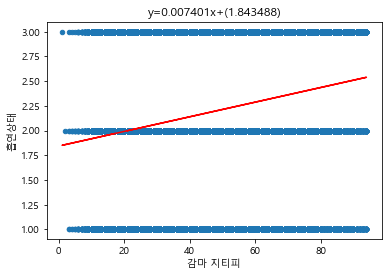

In [14]:
import numpy as np
df_smoke.plot(kind='scatter',x='감마 지티피',y='흡연상태')
fit_weight = np.polyfit(df_smoke['감마 지티피'], df_smoke['흡연상태'], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
              
plt.plot(df_smoke['감마 지티피'], trend_f(df_smoke['감마 지티피']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

In [15]:
from sklearn.metrics import r2_score
r2 = r2_score(df_smoke['감마 지티피'], trend_f(df_smoke['감마 지티피']))

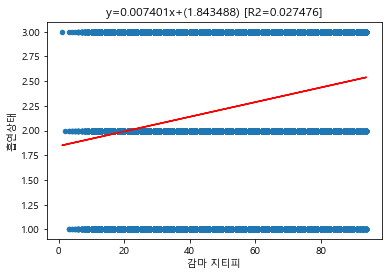

In [16]:
df_smoke.plot(kind='scatter',x='감마 지티피',y='흡연상태')
fit_weight = np.polyfit(df_smoke['감마 지티피'], df_smoke['흡연상태'], 1)
trend_f = np.poly1d(fit_weight)
r2 = r2_score(df_smoke['흡연상태'], trend_f(df_smoke['감마 지티피']))
              
plt.plot(df_smoke['감마 지티피'], trend_f(df_smoke['감마 지티피']),"r-")
plt.title("y={:.6f}x+({:.6f}) [R2={:.6f}]".format(fit_weight[0], fit_weight[1], r2))
plt.show()

## 음주여부

In [17]:
import pandas as pd
df_drink = pd.read_pickle('./reduction_02.pkl')
df_drink.head()

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,165,60,72.1,1.2,1.5,127.0,79.0,90.0,1.1,21.0,27.0,21.0,1.0,0.0
1,185,85,94.0,1.2,1.2,114.0,72.0,86.0,1.1,25.0,32.0,26.0,3.0,1.0
2,165,55,77.5,1.5,1.5,130.0,70.0,87.0,0.9,18.0,10.0,15.0,1.0,0.0
3,165,75,84.0,1.0,1.0,139.0,80.0,92.0,0.9,27.0,30.0,25.0,2.0,1.0
4,175,70,83.0,0.9,1.2,110.0,70.0,120.0,0.8,19.0,14.0,25.0,3.0,1.0


In [12]:
df_drink.corr()

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
신장(5Cm단위),1.000000,0.454712,0.201513,0.013498,0.010735,0.032670,0.001822,0.021294,0.043766,-0.037445,-0.020334,-0.032611,0.020522,0.052922
체중(5Kg 단위),0.454712,1.000000,0.812286,0.012180,0.014594,0.244749,0.204881,0.152500,0.077333,0.131788,0.302799,0.198254,0.012450,0.044847
허리둘레,0.201513,0.812286,1.000000,-0.002606,-0.000349,0.222617,0.209572,0.146519,0.035809,0.151401,0.346258,0.254378,0.014987,0.040811
시력(좌),0.013498,0.012180,-0.002606,1.000000,0.389503,0.003248,0.005345,-0.001758,-0.006356,-0.001411,-0.006777,-0.012223,-0.011468,0.005432
시력(우),0.010735,0.014594,-0.000349,0.389503,1.000000,0.005170,0.007706,-0.002727,-0.007312,0.010812,0.004248,-0.007745,-0.017259,0.000309
수축기 혈압,0.032670,0.244749,0.222617,0.003248,0.005170,1.000000,0.728616,0.126998,-0.020302,0.094636,0.126072,0.168579,0.010137,0.037998
이완기 혈압,0.001822,0.204881,0.209572,0.005345,0.007706,0.728616,1.000000,0.120640,-0.008323,0.106710,0.137461,0.189241,0.018557,0.050810
식전혈당(공복혈당),0.021294,0.152500,0.146519,-0.001758,-0.002727,0.126998,0.120640,1.000000,0.027637,0.021568,0.115683,0.172436,0.034543,0.045809
혈청크레아티닌,0.043766,0.077333,0.035809,-0.006356,-0.007312,-0.020302,-0.008323,0.027637,1.000000,0.057465,0.047106,0.009149,-0.061740,-0.006329
(혈청지오티)AST,-0.037445,0.131788,0.151401,-0.001411,0.010812,0.094636,0.106710,0.021568,0.057465,1.000000,0.670573,0.327020,-0.008824,0.031180


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

<AxesSubplot:>

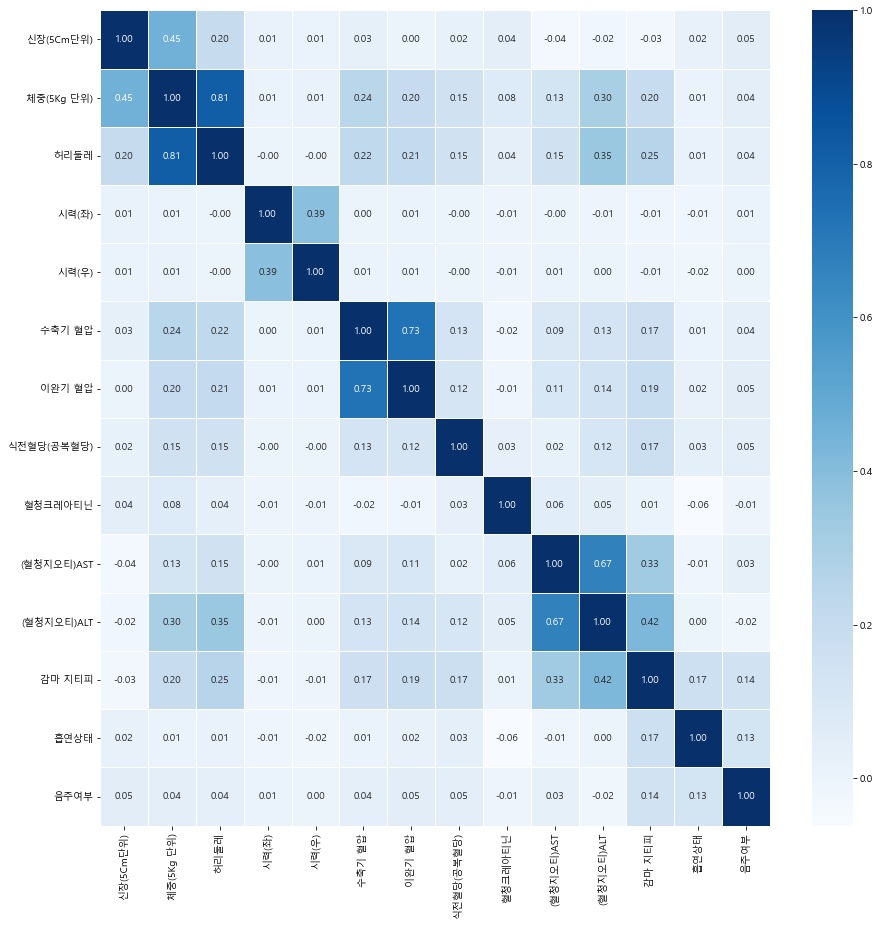

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_drink.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [20]:
corr_df1 = df_drink.corr()
corr_df1 = corr_df1.apply(lambda x: round(x ,2))
corr_df1

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
신장(5Cm단위),1.00,0.45,0.20,0.01,0.01,0.03,0.00,0.02,0.04,-0.04,-0.02,-0.03,0.02,0.05
체중(5Kg 단위),0.45,1.00,0.81,0.01,0.01,0.24,0.20,0.15,0.08,0.13,0.30,0.20,0.01,0.04
허리둘레,0.20,0.81,1.00,-0.00,-0.00,0.22,0.21,0.15,0.04,0.15,0.35,0.25,0.01,0.04
시력(좌),0.01,0.01,-0.00,1.00,0.39,0.00,0.01,-0.00,-0.01,-0.00,-0.01,-0.01,-0.01,0.01
시력(우),0.01,0.01,-0.00,0.39,1.00,0.01,0.01,-0.00,-0.01,0.01,0.00,-0.01,-0.02,0.00
수축기 혈압,0.03,0.24,0.22,0.00,0.01,1.00,0.73,0.13,-0.02,0.09,0.13,0.17,0.01,0.04
이완기 혈압,0.00,0.20,0.21,0.01,0.01,0.73,1.00,0.12,-0.01,0.11,0.14,0.19,0.02,0.05
식전혈당(공복혈당),0.02,0.15,0.15,-0.00,-0.00,0.13,0.12,1.00,0.03,0.02,0.12,0.17,0.03,0.05
혈청크레아티닌,0.04,0.08,0.04,-0.01,-0.01,-0.02,-0.01,0.03,1.00,0.06,0.05,0.01,-0.06,-0.01
(혈청지오티)AST,-0.04,0.13,0.15,-0.00,0.01,0.09,0.11,0.02,0.06,1.00,0.67,0.33,-0.01,0.03


In [21]:
# Series이므로 DataFrame으로 변경한다. 
s = corr_df1.unstack()
df_drink1 = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['corr'])
df_drink1.style.background_gradient(cmap='viridis')

,,corr
허리둘레,체중(5Kg 단위),0.810000
체중(5Kg 단위),허리둘레,0.810000
수축기 혈압,이완기 혈압,0.730000
이완기 혈압,수축기 혈압,0.730000
(혈청지오티)AST,(혈청지오티)ALT,0.670000
(혈청지오티)ALT,(혈청지오티)AST,0.670000
신장(5Cm단위),체중(5Kg 단위),0.450000
체중(5Kg 단위),신장(5Cm단위),0.450000
감마 지티피,(혈청지오티)ALT,0.420000
(혈청지오티)ALT,감마 지티피,0.420000


In [22]:
corr6 = corr_df1.nlargest(15, '음주여부')
corr6 = corr6[list(corr6.index)]
corr6

,음주여부,감마 지티피,흡연상태,신장(5Cm단위),이완기 혈압,식전혈당(공복혈당),체중(5Kg 단위),허리둘레,수축기 혈압,(혈청지오티)AST,시력(좌),시력(우),혈청크레아티닌,(혈청지오티)ALT
음주여부,1.00,0.14,0.13,0.05,0.05,0.05,0.04,0.04,0.04,0.03,0.01,0.00,-0.01,-0.02
감마 지티피,0.14,1.00,0.17,-0.03,0.19,0.17,0.20,0.25,0.17,0.33,-0.01,-0.01,0.01,0.42
흡연상태,0.13,0.17,1.00,0.02,0.02,0.03,0.01,0.01,0.01,-0.01,-0.01,-0.02,-0.06,0.00
신장(5Cm단위),0.05,-0.03,0.02,1.00,0.00,0.02,0.45,0.20,0.03,-0.04,0.01,0.01,0.04,-0.02
이완기 혈압,0.05,0.19,0.02,0.00,1.00,0.12,0.20,0.21,0.73,0.11,0.01,0.01,-0.01,0.14
식전혈당(공복혈당),0.05,0.17,0.03,0.02,0.12,1.00,0.15,0.15,0.13,0.02,-0.00,-0.00,0.03,0.12
체중(5Kg 단위),0.04,0.20,0.01,0.45,0.20,0.15,1.00,0.81,0.24,0.13,0.01,0.01,0.08,0.30
허리둘레,0.04,0.25,0.01,0.20,0.21,0.15,0.81,1.00,0.22,0.15,-0.00,-0.00,0.04,0.35
수축기 혈압,0.04,0.17,0.01,0.03,0.73,0.13,0.24,0.22,1.00,0.09,0.00,0.01,-0.02,0.13
(혈청지오티)AST,0.03,0.33,-0.01,-0.04,0.11,0.02,0.13,0.15,0.09,1.00,-0.00,0.01,0.06,0.67


### 음주여부와 상관관계 있는(0.1이상) 컬럼
- 감마 지티피 (0.14)
- 흡연상태 (0.13)

## 상관관계 정할 때 논문 참고

 ```
 다변량 분석의 결과에서는 혈중 감마지티피의 상승에 영향을 미치는 요인이 성별에 따라 다소 달랐으나 남녀 모두에서 연령, 음주빈도, 흡연량, 이완기혈압, 공복시혈당, 총콜레스테롤, ALT가 유의한 영향이 있음을 확인할 수 있었다. 
 
 신주연, 김용규, 박신구, 이지나, 김환철, 임종한, 홍윤철.(2005).혈중 감마지티피 상승의 임상적 의의.대한직업환경의학회지,17(1),1-9.
 ```

## 음주와 감마지티피 추세선&기울기 확인

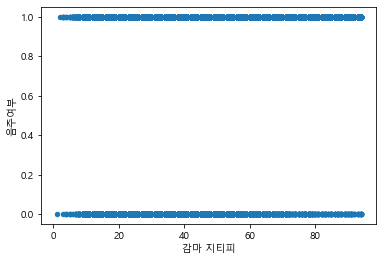

In [23]:
import matplotlib.pyplot as plt
df_drink.plot(kind='scatter',x='감마 지티피',y='음주여부')
plt.show()

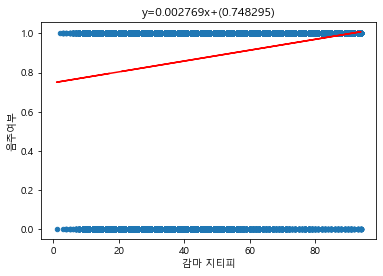

In [25]:
import numpy as np
df_drink.plot(kind='scatter',x='감마 지티피',y='음주여부')
fit_weight = np.polyfit(df_drink['감마 지티피'], df_drink['음주여부'], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
              
plt.plot(df_drink['감마 지티피'], trend_f(df_drink['감마 지티피']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(df_drink['감마 지티피'], trend_f(df_drink['감마 지티피']))

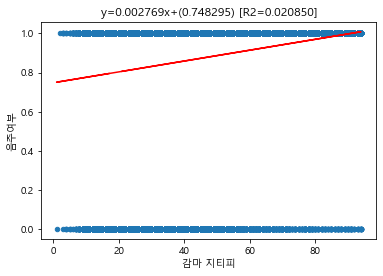

In [27]:
df_drink.plot(kind='scatter',x='감마 지티피',y='음주여부')
fit_weight = np.polyfit(df_drink['감마 지티피'], df_drink['음주여부'], 1)
trend_f = np.poly1d(fit_weight)

r2 = r2_score(df_drink['음주여부'], trend_f(df_drink['감마 지티피']))
              
plt.plot(df_drink['감마 지티피'], trend_f(df_drink['감마 지티피']),"r-")
plt.title("y={:.6f}x+({:.6f}) [R2={:.6f}]".format(fit_weight[0], fit_weight[1], r2))
plt.show()

In [28]:
df = pd.read_pickle('./reduction_02.pkl')
df

,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),수축기 혈압,이완기 혈압,식전혈당(공복혈당),혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부
0,165,60,72.1,1.2,1.5,127.0,79.0,90.0,1.1,21.0,27.0,21.0,1.0,0.0
1,185,85,94.0,1.2,1.2,114.0,72.0,86.0,1.1,25.0,32.0,26.0,3.0,1.0
2,165,55,77.5,1.5,1.5,130.0,70.0,87.0,0.9,18.0,10.0,15.0,1.0,0.0
3,165,75,84.0,1.0,1.0,139.0,80.0,92.0,0.9,27.0,30.0,25.0,2.0,1.0
4,175,70,83.0,0.9,1.2,110.0,70.0,120.0,0.8,19.0,14.0,25.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62372,160,75,96.5,1.2,1.0,125.0,85.0,100.0,0.8,17.0,26.0,76.0,3.0,1.0
62373,165,65,84.1,9.9,0.5,118.0,78.0,111.0,0.8,17.0,14.0,30.0,3.0,1.0
62374,170,75,89.0,1.5,1.2,124.0,86.0,107.0,1.0,20.0,35.0,34.0,3.0,0.0
62375,165,70,82.0,1.0,1.2,138.0,86.0,104.0,0.9,35.0,46.0,52.0,2.0,1.0


In [29]:
df_gby = df.set_index(['흡연상태','음주여부']).groupby(level=[1,0])
df_gby

In [30]:
df_gby.size()

음주여부  흡연상태
0.0   1.0      4546
      2.0      1988
      3.0      3064
1.0   1.0     14542
      2.0     15662
      3.0     22575
dtype: int64

In [31]:
df_gby.mean()

신장(5Cm단위)  체중(5Kg 단위)       허리둘레     시력(좌)     시력(우)      수축기 혈압  \
음주여부 흡연상태                                                                      
0.0  1.0   170.226573   71.390233  84.205741  1.114826  1.127783  121.721953   
     2.0   171.224849   72.917505  84.963732  1.108451  1.114839  122.131791   
     3.0   170.421018   71.912533  84.346834  1.106201  1.097389  121.162859   
1.0  1.0   171.076537   72.645441  84.878896  1.121696  1.120204  122.466098   
     2.0   171.680820   73.978419  85.775444  1.127953  1.126778  123.157068   
     3.0   171.318494   72.872868  85.151012  1.108403  1.105320  122.807619   

              이완기 혈압  식전혈당(공복혈당)   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마 지티피  
음주여부 흡연상태                                                                      
0.0  1.0   76.760669   95.753850  0.944545   23.931368   27.250110  27.908271  
     2.0   77.090543   96.091549  0.942656   24.147384   28.457243  28.623239  
     3.0   76.297650   96.094321  0.928427   23.259465   28.221932  30.752937  
1.0  1.0   77.562921   96.653074  0.946603   24.290215   27.132994  32.366662  
     2.0   78.138169   97.411506  0.942696   24.517303   27.628400  35.576682  
     3.0   78.000975   97.477697  0.925829   24.209214   27.108394  39.791672

In [32]:
df_gby.describe()

신장(5Cm단위)                                                           \
              count        mean       std    min    25%    50%    75%    max   
음주여부 흡연상태                                                                      
0.0  1.0     4546.0  170.226573  6.399199  150.0  165.0  170.0  175.0  190.0   
     2.0     1988.0  171.224849  5.975225  150.0  165.0  170.0  175.0  190.0   
     3.0     3064.0  170.421018  5.943660  150.0  165.0  170.0  175.0  190.0   
1.0  1.0    14542.0  171.076537  5.930516  150.0  165.0  170.0  175.0  190.0   
     2.0    15662.0  171.680820  5.707845  150.0  170.0  170.0  175.0  190.0   
     3.0    22575.0  171.318494  5.829106  150.0  170.0  170.0  175.0  190.0   

          체중(5Kg 단위)             ... (혈청지오티)ALT         감마 지티피             \
               count       mean  ...        75%   max    count       mean   
음주여부 흡연상태                        ...                                        
0.0  1.0      4546.0  71.390233  ...       34.0  64.0   4546.0  27.908271   
     2.0      1988.0  72.917505  ...       36.0  64.0   1988.0  28.623239   
     3.0      3064.0  71.912533  ...       35.0  64.0   3064.0  30.752937   
1.0  1.0     14542.0  72.645441  ...       33.0  64.0  14542.0  32.366662   
     2.0     15662.0  73.978419  ...       34.0  64.0  15662.0  35.576682   
     3.0     22575.0  72.872868  ...       34.0  64.0  22575.0  39.791672   

                                                   
                 std  min   25%   50%   75%   max  
음주여부 흡연상태                                          
0.0  1.0   15.258872  3.0  17.0  23.0  34.0  94.0  
     2.0   15.282754  4.0  18.0  24.0  35.0  94.0  
     3.0   15.760387  1.0  19.0  26.0  38.0  94.0  
1.0  1.0   17.527431  3.0  20.0  27.0  40.0  94.0  
     2.0   18.580958  2.0  22.0  30.0  45.0  94.0  
     3.0   19.911527  3.0  24.0  35.0  52.0  94.0  

[6 rows x 96 columns]

In [47]:
df_rgtp = df_gby.get_group((0.0, 1.0))[['감마 지티피','식전혈당(공복혈당)']]
df_rgtp

감마 지티피  식전혈당(공복혈당)
흡연상태 음주여부                    
1.0  0.0     21.0        90.0
     0.0     15.0        87.0
     0.0     20.0        88.0
     0.0     47.0        95.0
     0.0     32.0        94.0
...           ...         ...
     0.0     25.0        85.0
     0.0     20.0       105.0
     0.0     22.0        95.0
     0.0     32.0        89.0
     0.0     15.0        95.0

[4546 rows x 2 columns]

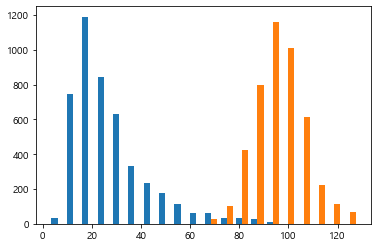

In [48]:
plt.hist(df_rgtp, bins=20)
plt.show()

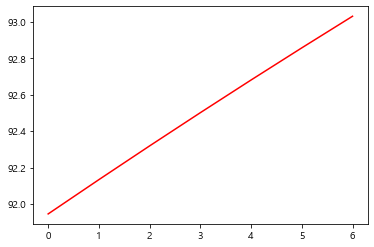

In [72]:
import numpy as np
import matplotlib.pyplot as plt 

x=df_rgtp['감마 지티피']
y=df_rgtp['식전혈당(공복혈당)']

linear_model=np.polyfit(x,y,2)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,7)
plt.plot(x_s,linear_model_fn(x_s),color="red")

#plt.scatter(x,y,color="blue",alpha=0.05)
#plt.title("Scatter Plot of the data")
#plt.xlabel("X")
#plt.ylabel("Y")


plt.show()

In [79]:
import numpy as np

fit_line = np.polyfit(x, y, 1)
print(fit_line)

[7.16588910e-02 9.37539738e+01]


In [67]:
from sklearn.metrics import r2_score
r2 = r2_score(x, trend_f(x))

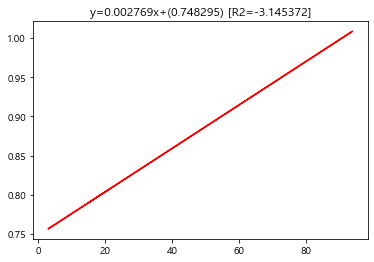

In [80]:
x=df_rgtp['감마 지티피']
y=df_rgtp['식전혈당(공복혈당)']

#df_rgtp.plot(kind='scatter',x,y)
#fit_weight = np.polyfit(x, y, 1)
trend_f = np.poly1d(fit_weight)

r2 = r2_score(x, trend_f(x))
              
plt.plot(x, trend_f(x),"r-")
plt.title("y={:.6f}x+({:.6f}) [R2={:.6f}]".format(fit_weight[0], fit_weight[1], r2))
plt.show()

In [33]:
for key,group in df_gby:
    print(f'key:{key}')
    print(f'group:{len(group)}')
    print(group.head())
    print('\n')

key:(0.0, 1.0)
group:4546
           신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  시력(우)  수축기 혈압  이완기 혈압  \
흡연상태 음주여부                                                              
1.0  0.0         165          60  72.1    1.2    1.5   127.0    79.0   
     0.0         165          55  77.5    1.5    1.5   130.0    70.0   
     0.0         160          55  78.6    0.7    0.6   128.0    82.0   
     0.0         180          80  89.0    0.9    1.0   127.0    84.0   
     0.0         170          65  77.6    1.2    1.0   108.0    66.0   

           식전혈당(공복혈당)  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마 지티피  
흡연상태 음주여부                                                       
1.0  0.0         90.0      1.1        21.0        27.0    21.0  
     0.0         87.0      0.9        18.0        10.0    15.0  
     0.0         88.0      1.0        20.0        12.0    20.0  
     0.0         95.0      1.0        25.0        39.0    47.0  
     0.0         94.0      0.8        37.0        55.0    32.0  


key:(0.0, 2.